In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))
# prints Training data: (60000, 28, 28), (60000,)
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))
# prints Test data: (10000, 28, 28), (10000,)
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))


11490434/11490434 [==============================] - 0s 0us/step
Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


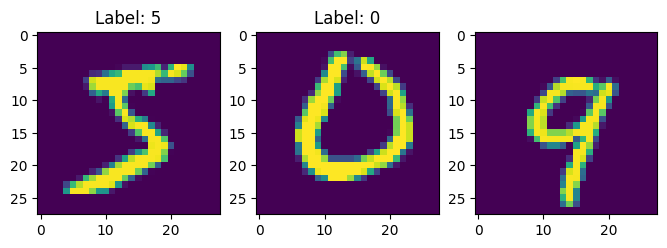

In [ ]:
plt.figure(figsize=(8, 5))
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))
plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show()


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]
print("x_train: {}".format(x_train.shape)) # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) #prints y_val: (10000,)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [ ]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)
print("x_train: {}".format(x_train.shape)) #prints x_train: (50000, 784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)


x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)



In [ ]:
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [ ]:
import tensorflow as tf

# Define input shape and number of labels
input_shape = new_dimension  # Example value, set this to your input dimension
no_labels = 10       # Example value, set this to the number of labels in your dataset

# Create model architecture using the functional API
def multilayer_perceptron(input_shape, no_classes, first_layer_neurons=256, second_layer_neurons=128):
    inputs = tf.keras.Input(shape=input_shape)

    # First layer
    first_weight = tf.Variable(tf.random.uniform([input_shape[0], first_layer_neurons]))
    first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(inputs, first_weight), first_bias))

    # Second layer
    second_weight = tf.Variable(tf.random.uniform([first_layer_neurons, second_layer_neurons]))
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))

    # Output layer
    final_weight = tf.Variable(tf.random.uniform([second_layer_neurons, no_classes]))
    final_bias = tf.Variable(tf.zeros([no_classes]))
    logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

    return tf.keras.Model(inputs=inputs, outputs=logits)

# Define the model
model = multilayer_perceptron((new_dimension,), no_labels)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Example data for demonstration (replace with actual data)
import numpy as np
X_train = np.random.rand(1000, new_dimension)
Y_train = np.random.randint(0, 2, size=(1000, no_labels))

# Train the model (replace with actual training data and labels)
model.fit(X_train, Y_train, epochs=10, batch_size=32)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 tf.linalg.matmul (TFOpLamb  (None, 256)               0         
 da)                                                             
                                                                 
 tf.math.add (TFOpLambda)    (None, 256)               0         
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 256)               0         
                                                                 
 tf.linalg.matmul_1 (TFOpLa  (None, 128)               0         
 mbda)                                                           
                                                                 
 tf.math.add_1 (TFOpLambda)  (None, 128)               0     

In [ ]:
#Building a Sequential Feed Forward Network in Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1)
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Epoch 1/20
50000/50000 [==============================] - 271s 5ms/step - loss: 0.2584 - accuracy: 0.9252 - val_loss: 0.1499 - val_accuracy: 0.9560
Epoch 2/20
50000/50000 [==============================] - 264s 5ms/step - loss: 0.1714 - accuracy: 0.9581 - val_loss: 0.1952 - val_accuracy: 0.9569
Epoch 3/20
50000/50000 [==============================] - 262s 5ms/step - loss: 0.1543 - accuracy: 0.9652 - val_loss: 0.1711 - val_accuracy: 0.9694
Epoch 4/20
50000/50000 [==============================] - 257s 5ms/step - loss: 0.1435 - accuracy: 0.9685 - val_loss: 0.2085 - val_accuracy: 0.9634
Epoch 5/20
50000/50000 [==============================] - 259s 5ms/step - loss: 0.1438 - accuracy: 0.9704 - val_loss: 0.2207 - val_accuracy: 0.9659
Epoch 6/20
50000/50000 [==============================] - 255s 5ms/step - loss: 0.1229 - accuracy: 0.9748 - val_loss: 0.1998 - val_accuracy: 0.9697
Epoch 7/20
50000/50000 [==============================] - 250s 5ms/step - loss: 0.1147 - accuracy: 0.9763 - val_

Text(0.5, 1.0, 'Loss Curves - before regularisation')

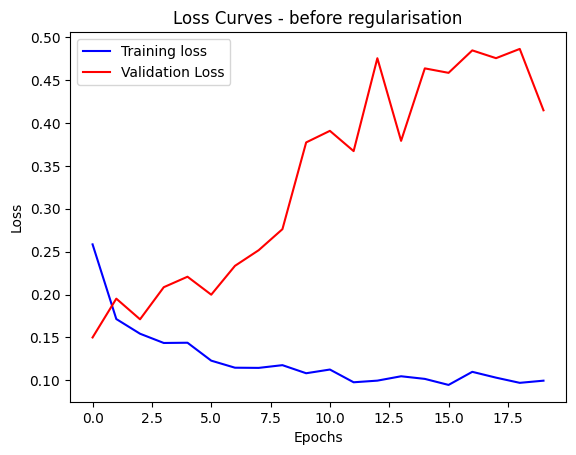

In [ ]:
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

Epoch 1/20
50/50 [==============================] - 3s 40ms/step - loss: 0.9840 - accuracy: 0.6888 - val_loss: 0.2920 - val_accuracy: 0.9159
Epoch 2/20
50/50 [==============================] - 2s 32ms/step - loss: 0.3779 - accuracy: 0.8895 - val_loss: 0.2011 - val_accuracy: 0.9425
Epoch 3/20
50/50 [==============================] - 3s 54ms/step - loss: 0.2847 - accuracy: 0.9166 - val_loss: 0.1617 - val_accuracy: 0.9548
Epoch 4/20
50/50 [==============================] - 2s 46ms/step - loss: 0.2382 - accuracy: 0.9305 - val_loss: 0.1384 - val_accuracy: 0.9612
Epoch 5/20
50/50 [==============================] - 2s 33ms/step - loss: 0.2024 - accuracy: 0.9413 - val_loss: 0.1218 - val_accuracy: 0.9646
Epoch 6/20
50/50 [==============================] - 2s 33ms/step - loss: 0.1772 - accuracy: 0.9482 - val_loss: 0.1108 - val_accuracy: 0.9684
Epoch 7/20
50/50 [==============================] - 2s 36ms/step - loss: 0.1556 - accuracy: 0.9541 - val_loss: 0.1066 - val_accuracy: 0.9682
Epoch 8/20
50

Text(0.5, 1.0, 'Loss Curves - after regularisation')

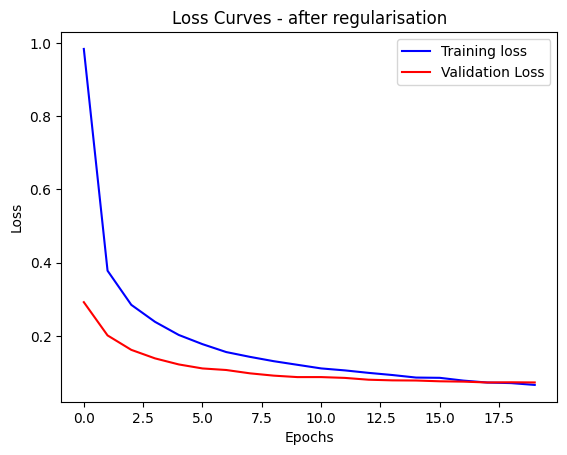

In [ ]:
#Although the validation and training loss seem great, we can see that the validation #loss i
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))
reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,
metrics=['accuracy'])
reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val),
epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')